In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')
N_1 = pd.read_csv('Zwoje_1.csv', sep=',\s', engine='python')
N_3 = pd.read_csv('Zwoje_3.csv', sep=',\s', engine='python')
N_5 = pd.read_csv('Zwoje_5.csv', sep=',\s', engine='python')
N_1

,I[A],alpha[o]
0,0.12,2.5
1,0.21,5.0
2,0.52,10.0
3,0.86,15.0
4,1.13,20.0
5,1.89,30.0
6,2.51,37.0
7,2.23,34.0
8,1.68,27.5
9,1.32,22.5


In [18]:
stopien = np.pi/180
R = 0.149
D_alpha = np.sqrt((stopien**2)/3 + (stopien)/2**2/3)
D_amper_1 = N_1['I[A]']*0.02+0.05
D_amper_3 = N_3['I[A]']*0.02+0.05
D_amper_5 = N_5['I[A]']*0.02+0.05

In [4]:
print(N_1.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  I[A] &  alpha[o] \\
\midrule
0  &  0.12 &       2.5 \\
1  &  0.21 &       5.0 \\
2  &  0.52 &      10.0 \\
3  &  0.86 &      15.0 \\
4  &  1.13 &      20.0 \\
5  &  1.89 &      30.0 \\
6  &  2.51 &      37.0 \\
7  &  2.23 &      34.0 \\
8  &  1.68 &      27.5 \\
9  &  1.32 &      22.5 \\
10 &  0.99 &      17.5 \\
11 &  0.65 &      12.5 \\
\bottomrule
\end{tabular}



In [5]:
print(N_3.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  I[A] &  alpha[o] \\
\midrule
0  &  0.04 &       2.5 \\
1  &  0.26 &      12.5 \\
2  &  0.18 &       9.0 \\
3  &  0.37 &      17.0 \\
4  &  0.48 &      21.0 \\
5  &  0.61 &      26.0 \\
6  &  0.88 &      38.0 \\
7  &  1.15 &      40.0 \\
8  &  1.35 &      45.0 \\
9  &  1.65 &      50.0 \\
10 &  2.43 &      60.0 \\
11 &  3.23 &      66.0 \\
\bottomrule
\end{tabular}



In [6]:
print(N_5.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  I[A] &  alpha[o] \\
\midrule
0  &  0.09 &       5.0 \\
1  &  0.29 &      16.0 \\
2  &  0.49 &      25.0 \\
3  &  0.57 &      27.5 \\
4  &  0.68 &      32.0 \\
5  &  0.88 &      38.0 \\
6  &  1.12 &      44.0 \\
7  &  1.36 &      50.0 \\
8  &  1.55 &      53.0 \\
9  &  1.78 &      57.0 \\
10 &  2.70 &      66.0 \\
11 &  3.33 &      70.0 \\
\bottomrule
\end{tabular}



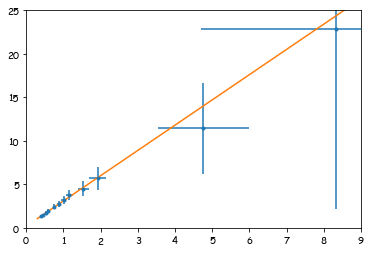

In [25]:
nad_I_1 = 1/N_1['I[A]']
ctan_1 = 1/np.tan(N_1['alpha[o]']*stopien)
D_ctan_1 = D_alpha/np.sin(N_1['alpha[o]']*stopien)**2
D_nad_I_1 = D_amper_1/N_1['I[A]']**2
plt.errorbar(nad_I_1,ctan_1,D_ctan_1,D_nad_I_1,'.')
plt.ylim(0,25)
plt.xlim(0,9)
zakres = np.linspace(0.3,8.8)
prosta_1, kowariancja_1 = np.polyfit(nad_I_1, ctan_1,1,cov=True,w=1/D_ctan_1)
plt.plot(zakres, np.polyval(prosta_1, zakres))

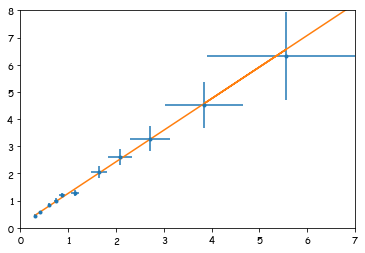

In [26]:
nad_I_3 = 1/N_3['I[A]']
ctan_3 = 1/np.tan(N_3['alpha[o]']*stopien)
D_ctan_3 = D_alpha/np.sin(N_3['alpha[o]']*stopien)**2
D_nad_I_3 = D_amper_3/N_3['I[A]']**2
plt.errorbar(nad_I_3,ctan_3,D_ctan_3,D_nad_I_3,'.')
plt.ylim(0,8)
plt.xlim(0,7)
zakres = np.linspace(0,7.8)
prosta_3, kowariancja_3 = np.polyfit(nad_I_3, ctan_3,1,cov=True,w=1/D_ctan_3)
plt.plot(nad_I_3, np.polyval(prosta_3, nad_I_3))

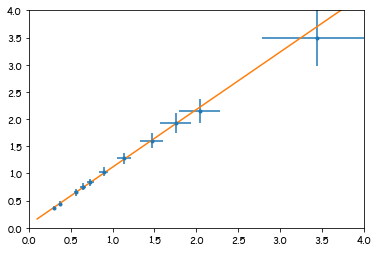

In [27]:
nad_I_5 = 1/N_5['I[A]']
ctan_5 = 1/np.tan(N_5['alpha[o]']*stopien)
D_ctan_5 = D_alpha/np.sin(N_5['alpha[o]']*stopien)**2
D_nad_I_5 = D_amper_5/N_5['I[A]']**2
plt.errorbar(nad_I_5,ctan_5,D_ctan_5,D_nad_I_5,'.')
plt.ylim(0,4)
plt.xlim(0,4)
zakres = np.linspace(0.1,4)
prosta_5, kowariancja_5 = np.polyfit(nad_I_5, ctan_5,1,cov=True,w=1/D_ctan_5)
plt.plot(zakres, np.polyval(prosta_5, zakres))

In [17]:
H_g_1 = prosta_1[0]*1/(2*R)
print(f'Dla 1 zwoju H_g = {H_g_1}')
H_g_3 = prosta_3[0]*3/(2*R)
print(f'Dla 3 zwojów H_g = {H_g_3}')
H_g_5 = prosta_5[0]*5/(2*R)
print(f'Dla 5 zwojów H_g = {H_g_5}')

Dla 1 zwoju H_g = 9.74557883212372
Dla 3 zwojów H_g = 11.704681714096507
Dla 5 zwojów H_g = 17.749043177862536
